In [1]:
import classy
from astropy.cosmology import Planck18_arXiv_v2 as Planck
import matplotlib.pyplot as plt
import numpy as np
import hmf

In [2]:
h = Planck.h
cosmo = Planck
class LCDM:
    h=h
    H0=Planck.H0.value
    omega_b=Planck.Ob0 * h**2
    omega_cdm=(Planck.Om0 - Planck.Ob0) * h**2
    omega_nu=Planck.Onu0 
    omega_k=Planck.Ok0
    
    m_ncdm = sum(Planck.m_nu).value 
    Neff=Planck.Neff
    N_ncdm = 1
    N_ur = Planck.Neff - N_ncdm
    
    Tcmb=Planck.Tcmb0.value
    A_s = 2.097e-9
    tau_reio = 0.0540
    n_s = 0.9652
    YHe = 0.24537116583825905
    reion_exponent = 1.5
    reion_width = 0.5

lnk = np.linspace(-10, 1, 100)
ks = np.exp(lnk)
lnk_max = 5

In [3]:
default_params = {
    'h': LCDM.h,
    'omega_b': LCDM.omega_b,
    'omega_cdm': LCDM.omega_cdm,
    'Omega_k': LCDM.omega_k,
    'N_ur': LCDM.N_ur,
    'N_ncdm': LCDM.N_ncdm,
    'm_ncdm': LCDM.m_ncdm,
    'A_s': LCDM.A_s,
    'n_s': LCDM.n_s,
    'T_cmb': LCDM.Tcmb,
    'tau_reio': LCDM.tau_reio,
    'YHe': LCDM.YHe,
    'reionization_exponent': LCDM.reion_exponent,
    'reionization_width': LCDM.reion_width,
    'P_k_max_1/Mpc': 20,
    'output': 'dTk,mPk,tCl'
}
cl = classy.Class()
cl.set(default_params)
cl.compute()


mf = hmf.hmf.MassFunction(
    cosmo_model=Planck,
    transfer_model=hmf.transfer_models.CLASS,
    transfer_params={
        'class_obj': cl
    },
    lnk_max=lnk_max
)
mf.power;

In [4]:

mf = hmf.hmf.MassFunction(
    cosmo_model=Planck,
    transfer_model=hmf.transfer_models.CLASS,
    transfer_params={
        'class_obj': cl
    },
    lnk_max=lnk_max
)
mf.power;

In [19]:
dmeff_params = default_params.copy()
dmeff_params.update({
    'omega_dmeff': 0.12038,
    'omega_cdm': 1e-10,
    'm_dmeff': 1.0,
    'sigma_dmeff': 1e-25,
    'npow_dmeff': 0,
})

cl_dmeff = classy.Class()
cl_dmeff.set(dmeff_params)
cl_dmeff.compute()

mf_dmeff = hmf.hmf.MassFunction(
    cosmo_model=Planck,
    transfer_model=hmf.transfer_models.CLASS,
    transfer_params={
        'class_obj': cl_dmeff,
        'flip_T': True
    },
    lnk_max=lnk_max
)
mf_dmeff.power;

In [20]:
pk = np.array([cl.pk(k, 0) for k in ks])
pk_dmeff = np.array([cl_dmeff.pk(k, 0) for k in ks])

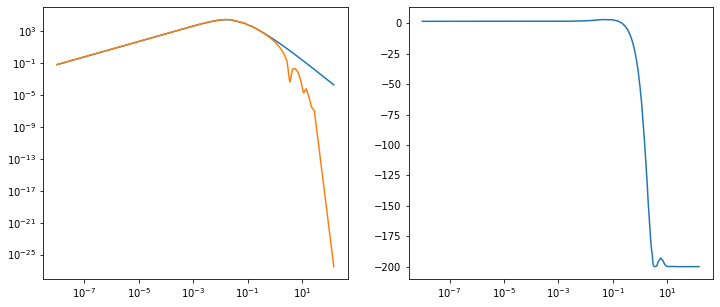

In [21]:
x = mf.k
y1 = mf.power
y2 = mf_dmeff.power

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5), facecolor='white')
ax1.plot(x, y1)
ax1.plot(x, y2)
ax1.set(xscale='log', yscale='log')


ax2.plot(x,200*(y2 - y1) / (y1+y2))
ax2.set(xscale='log', yscale='linear')
plt.show()

[Text(0, 0.5, '% difference'), None, Text(0.5, 0, 'm')]

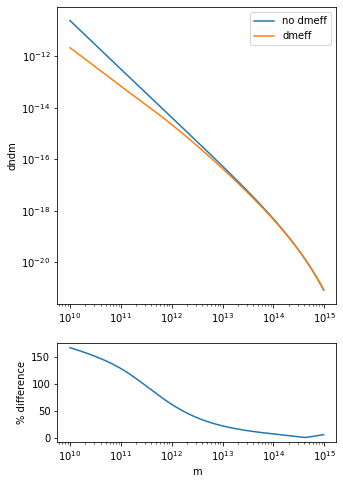

In [22]:
x = mf.m
y1 = mf.dndm
y2 = mf_dmeff.dndm

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 8), facecolor='white',
                              gridspec_kw={
                                  'height_ratios': [3,1]
                              })
ax1.plot(x, y1, label='no dmeff')
ax1.plot(x, y2, label='dmeff')
ax1.set(xscale='log', yscale='log', ylabel="dndm")
ax1.legend()

ax2.plot(x, 200 * np.abs(y2 - y1) / (y2 + y1))
ax2.set(xscale='log', ylabel='% difference', xlabel='m')

[None, None]

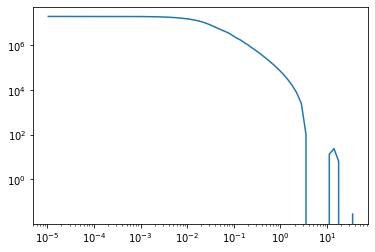

In [23]:
x = cl_dmeff.get_transfer(output_format='camb')
k, T = x['k (h/Mpc)'], x['-T_tot/k2']

fig,ax = plt.subplots(1,1, facecolor='white')
ax.plot(k, T)
ax.set(xscale='log', yscale='log')